In [1]:
import semopy as sem

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)

## 2016 exploratory factor analysis

In [4]:
from factor_analyzer import FactorAnalyzer

##https://www.datacamp.com/community/tutorials/introduction-factor-analysis
##load data

data_2016 = pd.read_csv('data/acute/sem/2016_acute_questions_keyed.csv')
efa_2016 = data_2016.drop(columns = ['organisation_name', 'organisation_id'], axis=1)

In [5]:
##case based missing data
#efa_2016.apply(lambda x: x.count(), axis=1) ##complete

efa_2016.isnull().sum(axis=1)

0       1
1       0
2       1
3       1
4      15
5       3
6       3
7      12
8       1
9       2
10     14
11      2
12      3
13     13
14      2
15      1
16      2
17      2
18      0
19      1
20      1
21      1
22      0
23      0
24      8
25      1
26      3
27      0
28      4
29      0
30      1
31      1
32      1
33      6
34      5
35      2
36      0
37      3
38      2
39      9
40      8
41      3
42      8
43      0
44      0
45      2
46      1
47      1
48      6
49      0
50      2
51      1
52      2
53      7
54      2
55     24
56      1
57      4
58      1
59      0
60      2
61      1
62      1
63      1
64      0
65      1
66     20
67      2
68     14
69      3
70      1
71     11
72      2
73     16
74      1
75     16
76      1
77      2
78      9
79      0
80      6
81      1
82      0
83      2
84      2
85      2
86     10
87      0
88      9
89      1
90      3
91      4
92      1
93      5
94      1
95      4
96      8
97      1
98      0
99      1


<AxesSubplot:>

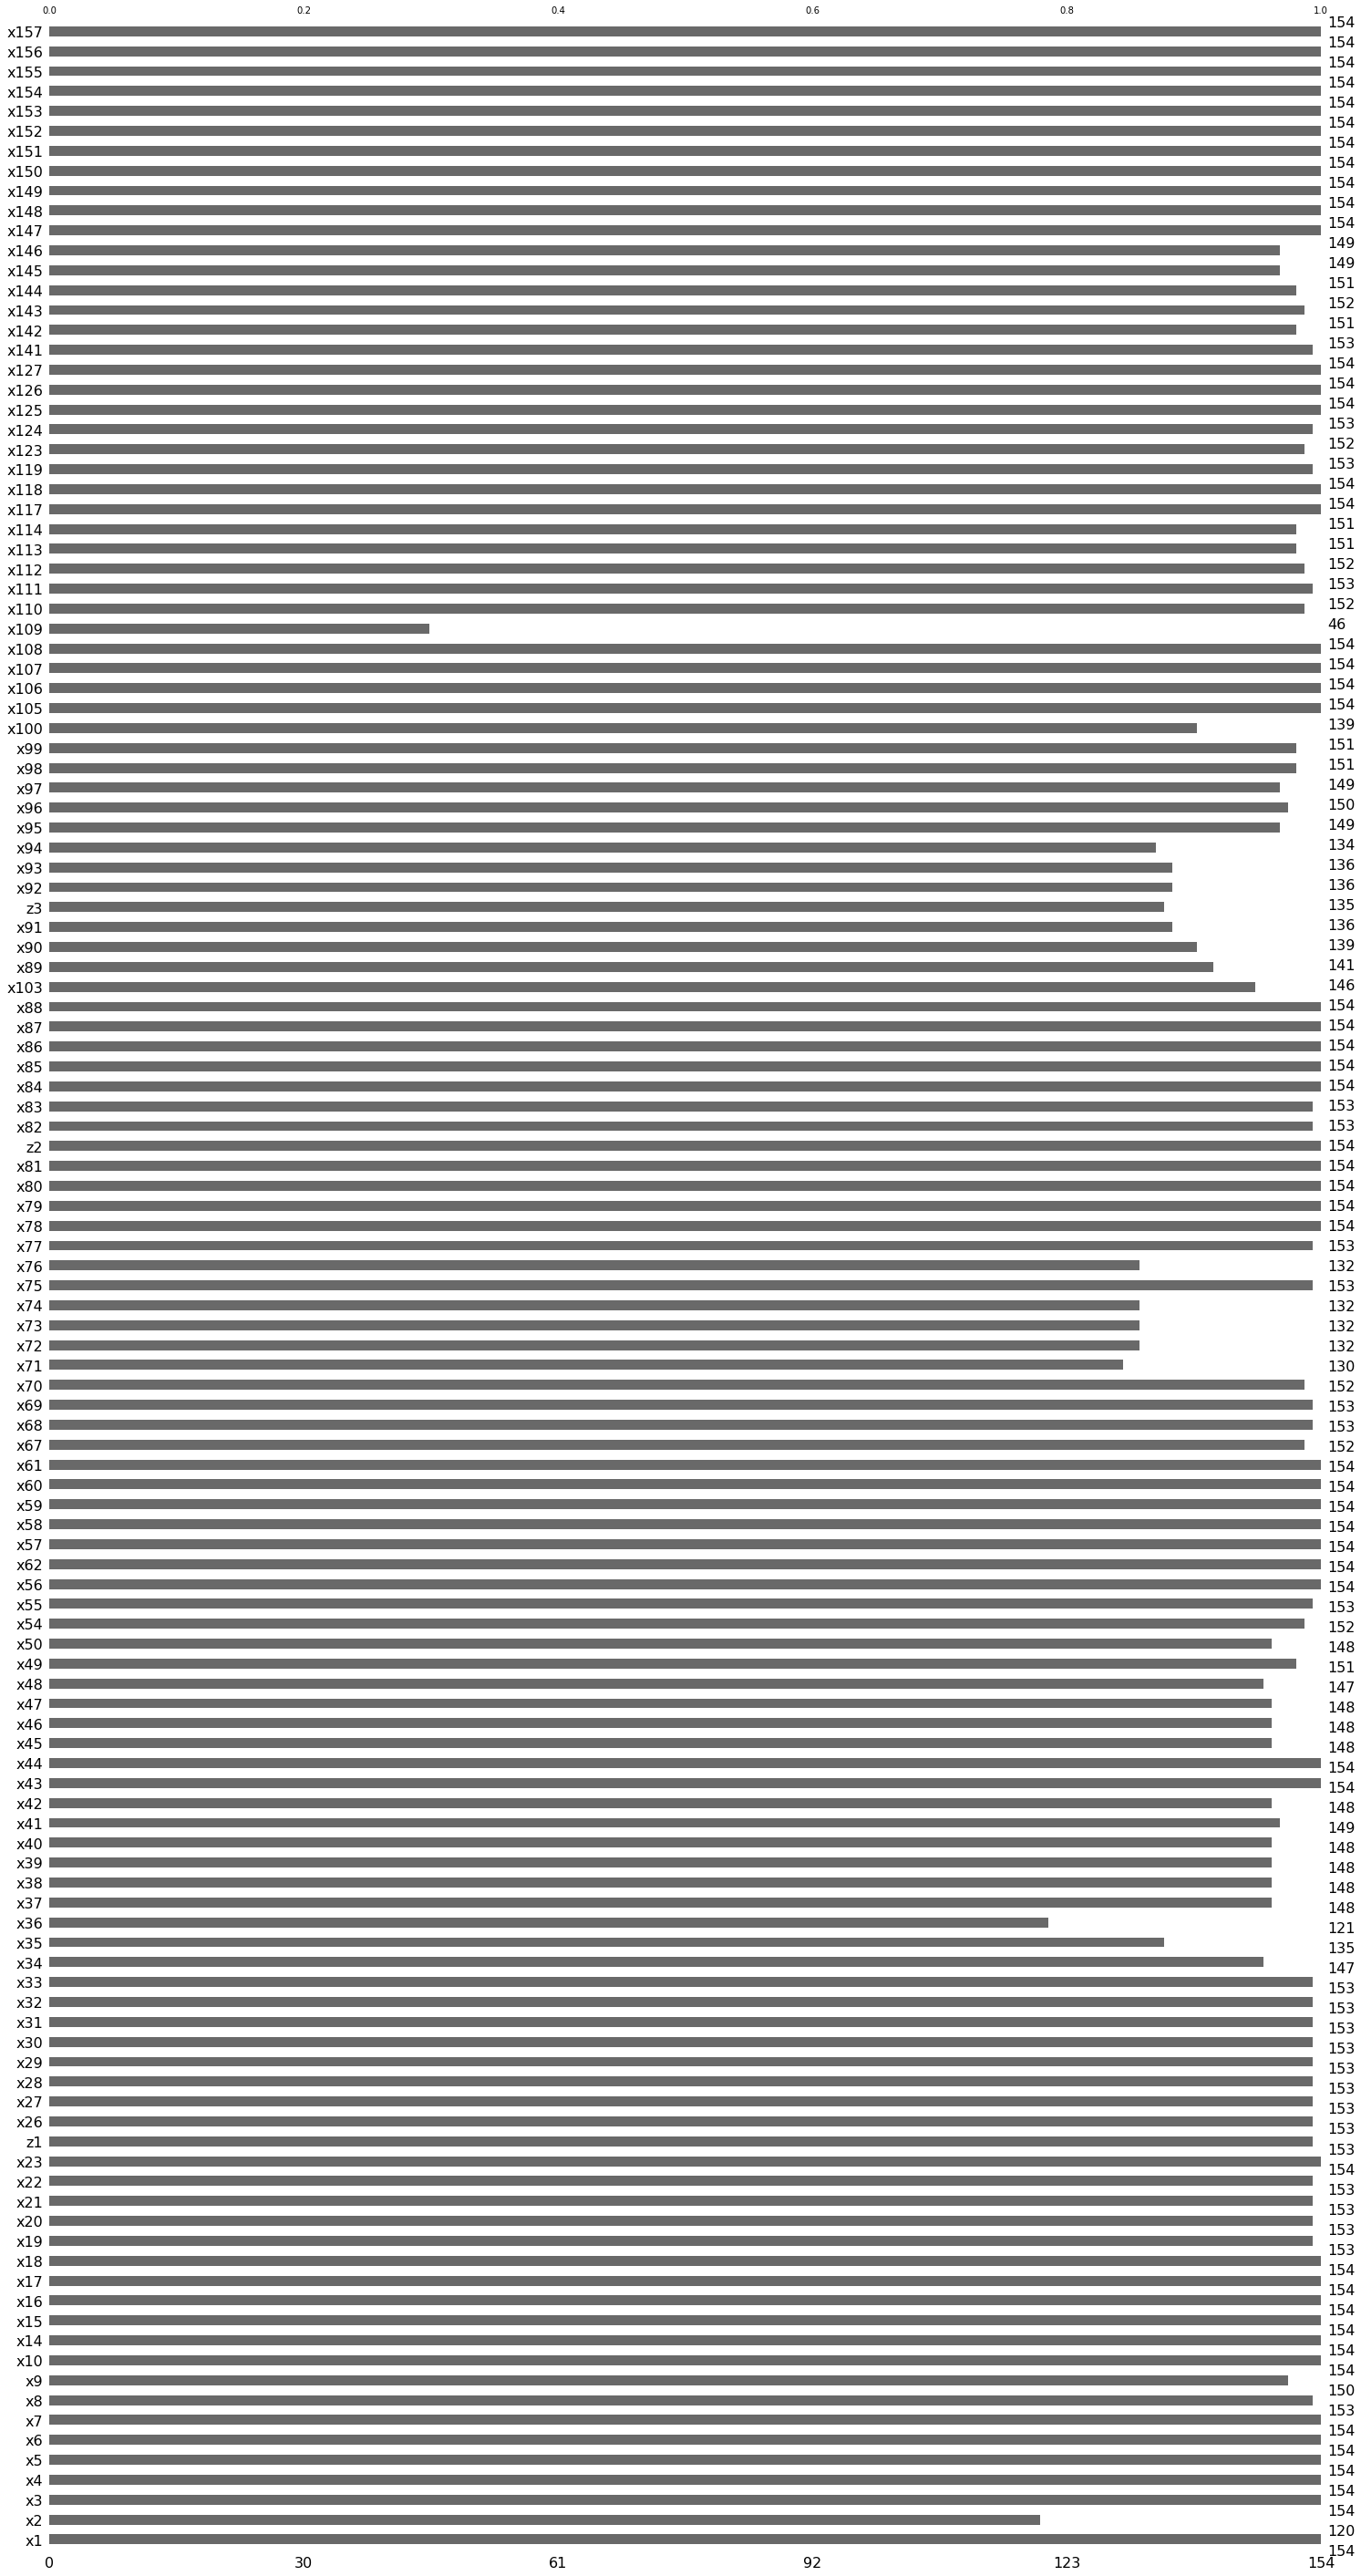

In [6]:
msno.bar(efa_2016)

<AxesSubplot:>

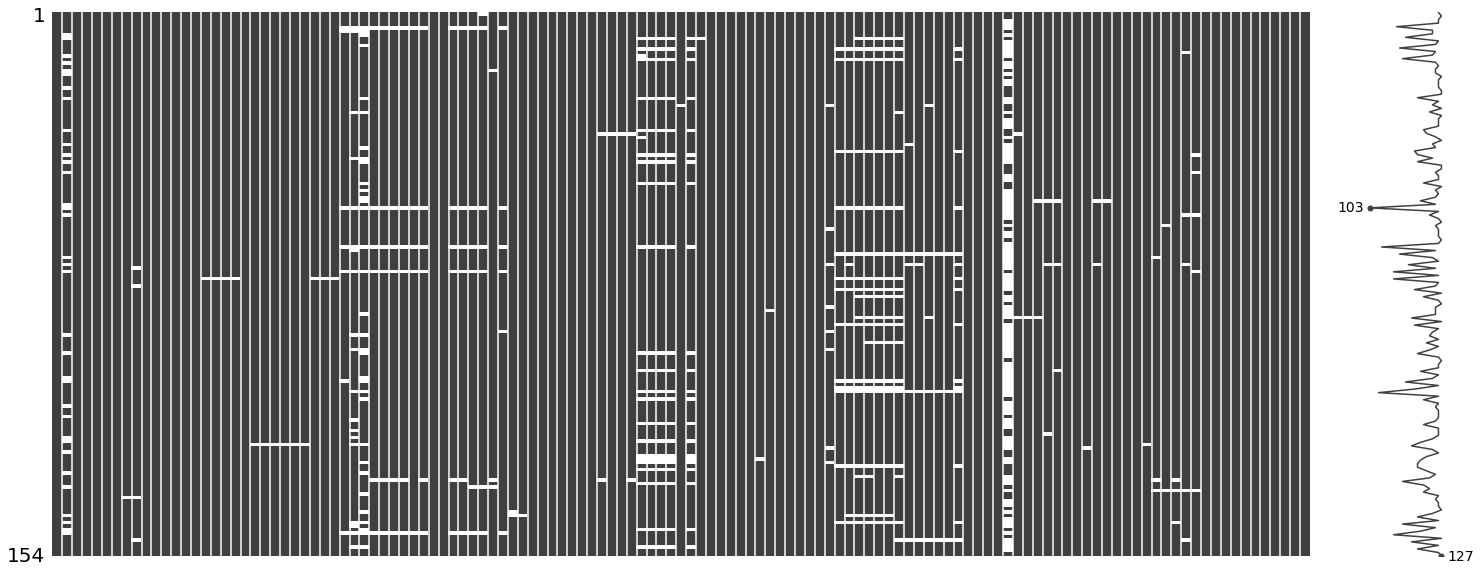

In [7]:
msno.matrix(efa_2016)

<AxesSubplot:>

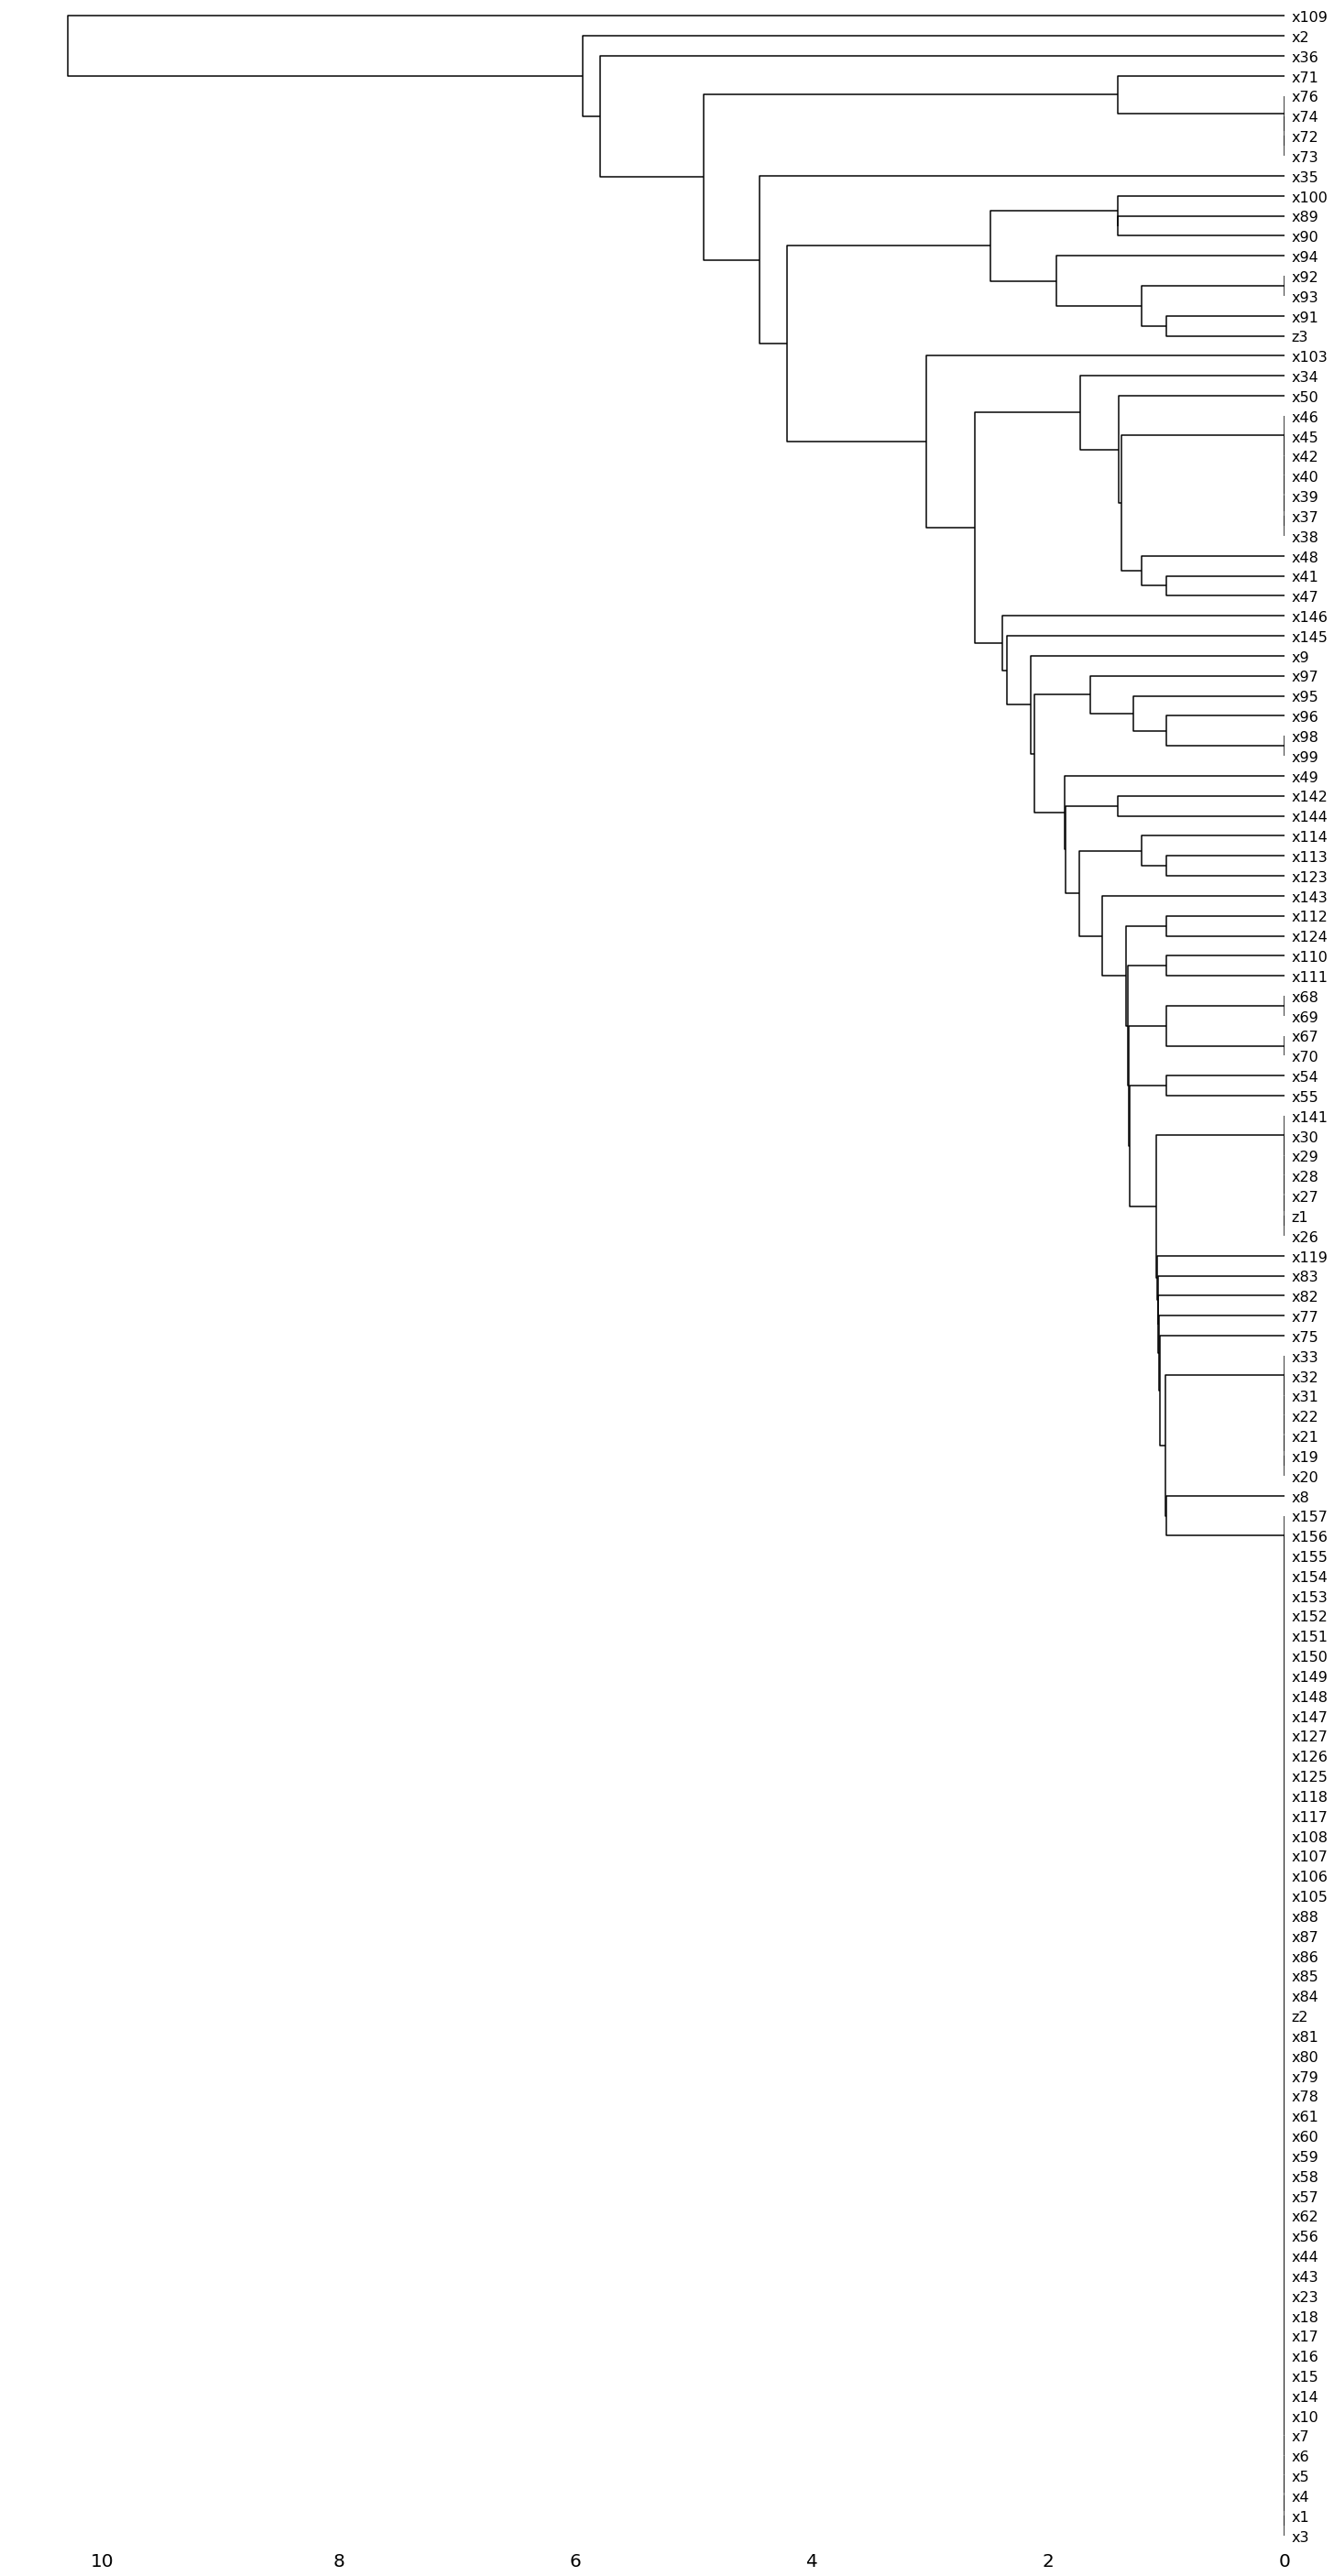

In [8]:
msno.dendrogram(efa_2016)

In [9]:
## for purposes of factor determination, impute using means
#################################################

efa_2016_impute = efa_2016.fillna(efa_2016.mean())

##################################################

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(efa_2016_impute)
chi_square_value, p_value

## significant test = factorisable

(15377.933697011471, 0.0)

In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(efa_2016_impute)
kmo_model

## <0.6 is inadequate

0.6395362165395188

In [12]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(efa_2016_impute)
loadings = fa.loadings_

ev, v = fa.get_eigenvalues()
pd.DataFrame(data =(ev.astype(str), v, np.cumsum(v)), index = ['eigenvalues', 'variance', 'var_sum'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126
eigenvalues,27.11720005901101,7.795688734542573,5.535726121208649,3.6393287872037843,3.193688177843248,2.936096651265516,2.7546553456102276,2.6114241096919826,2.5450784789040486,2.366060864453351,2.2644287685026017,2.0925959901574007,2.0301503140633295,1.950552856843275,1.8974075350882198,1.8411390687328064,1.7477280329663585,1.6932656983513021,1.630908973308192,1.5681576621127058,1.5550487364263925,1.4913943003094718,1.4588916761393083,1.38057190447063,1.3538993865534688,1.3380375930878667,1.3170238714789324,1.2721542662835827,1.2275169954185365,1.199446287751923,1.1505363404607196,1.1354412143516073,1.0892522393505004,1.0570972711464337,1.0420503689822425,1.0052093660695962,0.9716139301632856,0.9546584525741758,0.9048530302088362,0.8819006454649801,0.8484222839406299,0.833220481094087,0.8072970658520017,0.7864725908816379,0.7738022436487867,0.7259528553810061,0.6999116177905897,0.6896748911520518,0.6725611937600887,0.6447084694761127,0.6308816097112006,0.6000601083795716,0.5917478872356187,0.5629399343891967,0.5616184210599144,0.5520127733612238,0.5357103886545054,0.515197811781508,0.5086971743606954,0.49107227213407223,0.4581976169507544,0.44189330561382917,0.43607618432445616,0.42229016290244226,0.4005197210401524,0.39247547339751415,0.3873721215842074,0.3669679410304171,0.3549747692387593,0.3490467214982573,0.3342858790405944,0.3255184720061586,0.29993591551281334,0.2966090241069276,0.28613974583115936,0.26687251576360005,0.26491269877829515,0.25482495723088644,0.2445048608949474,0.23739053576568828,0.22840988628220177,0.22399968408915133,0.2170558379602955,0.20733240318378332,0.20248439298119353,0.1899483622649679,0.17499803322541668,0.16527816902768894,0.15817608001817623,0.15516015992642318,0.14743910144405242,0.13910147987940183,0.1340004029908656,0.1314923010169686,0.12563789695275174,0.11560740487314577,0.11290168557159055,0.09936121452704193,0.09230697929910067,0.08983825769205518,0.08888468959645655,0.07943743691540969,0.07546818861070122,0.07135772764752897,0.0639626598453981,0.0624155006273502,0.05602556307985415,0.05281470078319076,0.04865900237728667,0.04684007913415888,0.04444557044674449,0.04269833612578777,0.03747099757441418,0.03492502649225436,0.031480504047904326,0.0267210281119376,0.02654245214613899,0.025183681879885397,0.021416235164222003,0.01808833535964113,0.01603617351617649,0.015700910038193454,0.014610726952897498,0.013874266902227069,0.010077997411027606,0.0077440821906124575,0.005937590706924531
variance,26.487816,7.268914,4.998637,2.876079,2.450664,2.19568,1.988235,1.839453,1.772545,1.592114,1.496792,1.351295,1.25621,1.197604,1.171401,1.151381,0.998702,0.97049,0.904079,0.841034,0.805298,0.756526,0.707978,0.639191,0.623824,0.606611,0.56648,0.55801,0.514793,0.457505,0.409961,0.399091,0.365682,0.33306,0.286934,0.264719,0.243559,0.226339,0.211117,0.186523,0.160178,0.126853,0.112322,0.105191,0.075738,0.037445,0.011603,-0.003177,-0.020632,-0.035134,-0.043794,-0.064977,-0.078795,-0.084702,-0.096267,-0.110137,-0.113008,-0.134503,-0.145035,-0.156756,-0.16964,-0.202958,-0.221996,-0.227285,-0.245739,-0.252613,-0.275085,-0.286299,-0.294805,-0.31503,-0.327134,-0.340198,-0.347323,-0.349574,-0.361094,-0.372842,-0.381452,-0.388728,-0.403735,-0.411598,-0.427051,-0.43623,-0.452518,-0.46451,-0.466206,-0.47233,-0.490469,-0.492637,-0.508179,-0.517517,-0.527683,-0.529272,-0.53196,-0.548126,-0.557853,-0.561466,-0.567094,-0.57185,-0.581196,-0.590056,-0.603137,-0.62011,-0.621739,-0.633396,-0.635703,-0.639878,-0.648025,-0.65913,-0.671179,-0.686503,-0.688209,-0.692182,-0.698878,-0.706123,-0.710663,-0.720785,-0.724465,-0.732807,

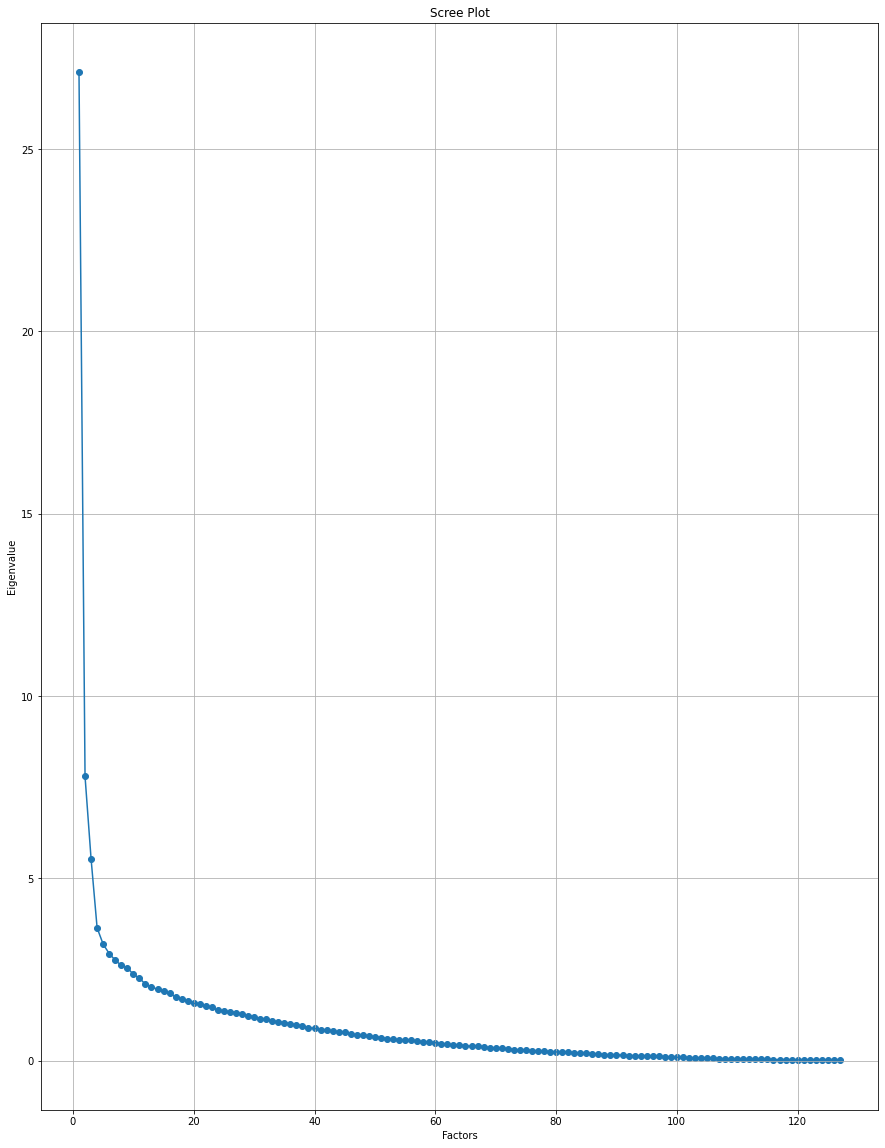

In [13]:
plt.figure(figsize=(15,20))
plt.scatter(range(1,efa_2016_impute.shape[1]+1),ev)
plt.plot(range(1,efa_2016_impute.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [14]:
fct = 34

fa = FactorAnalyzer()
fa.set_params(n_factors=fct, rotation="promax")
fa.fit(efa_2016)
loadings = fa.loadings_

In [15]:
efa_factors = pd.DataFrame(fa.loadings_,index=efa_2016.columns)

In [16]:
efa_factors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
x1,0.001746,0.321049,0.083574,-0.033558,0.190163,0.032466,-0.027908,-0.037129,-0.047253,0.131141,0.025162,-0.006778,-0.169305,-0.084703,-0.138905,0.075555,-0.044862,0.215425,-0.102492,0.037867,0.033815,0.018398,-0.116467,-0.153809,0.244572,0.048429,0.219630,0.063503,0.100413,0.125452,0.151735,-0.133229,-0.034615,-0.140070
x2,0.052273,0.622074,-0.004505,-0.058801,0.014006,-0.108539,-0.050597,0.154619,0.055673,-0.163573,-0.078806,-0.076819,0.121142,0.125606,-0.081893,-0.032288,0.060484,-0.151301,0.052945,0.099331,0.183644,-0.141095,0.060467,0.089658,0.156908,-0.147793,-0.050455,-0.021469,-0.017867,-0.080991,0.000383,0.158245,-0.150006,-0.130485
x3,0.050782,0.745947,0.075844,-0.151859,0.048879,0.154709,0.186717,-0.042360,0.029759,-0.052567,-0.009279,-0.053798,0.168048,-0.209164,-0.147688,-0.063774,-0.044285,0.126181,-0.042541,-0.106346,0.158815,0.033014,-0.101004,0.023183,0.069296,-0.059450,-0.025877,-0.164915,0.036681,0.121291,-0.063648,0.105307,-0.177446,0.020207
x4,-0.123689,0.501092,0.151591,0.098512,-0.085646,-0.010217,0.260387,-0.004938,-0.040640,-0.084976,0.044126,0.121159,-0.059088,-0.055755,-0.095664,0.021469,0.017177,0.236426,0.098555,-0.027255,-0.132362,0.002532,0.055026,0.099714,-0.078059,-0.066648,-0.072689,-0.020441,-0.115019,0.112497,-0.136823,0.067121,-0.028446,0.016821
x5,0.035314,0.208018,0.262056,-0.116556,-0.053015,0.174392,-0.008051,-0.052239,0.022688,-0.154976,0.040729,0.016309,-0.077967,-0.036206,0.149911,0.160870,-0.055543,0.188903,0.017723,0.081725,-0.046717,-0.008895,-0.025269,0.039015,0.052516,0.009762,-0.071793,0.144533,-0.118043,-0.109884,-0.069458,-0.023195,0.014504,-0.139439
x6,0.071912,0.227773,-0.040872,0.023655,0.037789,0.080261,-0.147840,0.092026,0.088419,0.039609,-0.264682,-0.069249,0.048943,0.103172,-0.029978,0.043118,-0.083645,0.245422,0.054269,-0.009151,-0.052763,-0.208254,-0.099135,-0.062491,0.460903,0.052074,0.011132,-0.263793,0.177749,0.016142,0.026830,0.099456,-0.000174,0.078230
x7,-0.053165,0.022911,0.184448,0.053885,-0.032538,-0.040211,0.132874,0.075021,0.032435,0.021826,-0.037116,-0.120816,0.078281,0.063353,-0.007736,-0.094230,0.120048,-0.086368,0.014744,0.040501,0.055346,-0.039911,0.000454,-0.219934,0.499962,0.043229,0.020539,-0.047163,0.024514,-0.137537,-0.235713,-0.083845,0.037398,0.044947
x8,-0.042065,0.318088,0.045654,0.058379,0.032142,0.022725,-0.137982,-0.073977,-0.140582,-0.136590,0.320266,0.137413,-0.038503,-0.113736,0.079734,0.108031,0.104469,0.163163,0.059617,0.010558,-0.007798,0.128653,0.116146,-0.045241,0.636778,-0.091069,-0.040468,0.056939,-0.052058,0.152112,0.107992,-0.022394,-0.177651,0.024450
x9,-0.019700,0.226147,0.009870,0.033471,-0.142732,0.029873,0.026380,-0.062619,-0.087304,-0.011583,0.112104,0.102654,0.073387,-0.114904,0.140684,0.062816,0.077909,0.005101,0.199624,0.050956,-0.043890,0.079638,0.008054,0.053971,0.804204,-0.124067,-0.115260,-0.056405,-0.040648,0.111873,0.088458,0.008370,0.015160,0.058300
x10,0.043893,0.203006,0.142265,0.155861,0.020857,0.106794,-0.043194,0.008578,0.245576,0.095989,-0.308337,0.131946,0.173534,-0.067783,-0.073072,-0.078690,0.035967,0.138801,0.007154,-0.117665,-0.084634,-0.069093,-0.031100,-0.073828,0.181150,0.154415,-0.087274,0.079882,0.072617,-0.132232,-0.009371,-0.164230,-0.070891,-0.022944


In [17]:
## join to key to get questions
key2016 = pd.read_excel('data/acute/0000_question_key.xlsx')

In [18]:
key2016T = key2016.T
key2016T.columns = key2016T.iloc[0]
key2016T = key2016T.drop(key2016T.index[0])

In [19]:
Q2016 = key2016T[['2016_section', '2016_key', '2016_all']].copy()
Q2016.dropna(inplace=True)
Q2016

2016_theme,2016_section,2016_key,2016_all
readiness,strategic,x1,Your organisation has a clearly defined digital strategy which is aligned to clinical and corporate objectives.
readiness.1,strategic,x2,"Implementation of the digital strategy is fully aligned to, and supported by, a service transformation programme(s)."
readiness.2,strategic,x3,There are effective processes in place to prioritise investment in digital technology and support ideas through to implementation
readiness.3,strategic,x4,Digital technology is being used to support improved collaboration and coordination across different parts of your organisation
readiness.4,strategic,x5,Your organisation participates in a wider health and care community initiative to achieve digital record sharing
readiness.5,leadership,x6,Your Board owns the organisations digital strategy and expects to receive regular updates about progress.
readiness.6,leadership,x7,The team leading the organisations digital transformation includes a board-level sponsor
readiness.7,leadership,x8,"You have strong clinical leadership through a nominated Chief Clinical Information Officer, Chief Nursing Information Officer or equivalent"
readiness.8,leadership,x9,Your CCIO or equivalent has adequate protected time as part of his/her job plan to undertake the requirements of the role within your organisation.
readiness.9,leadership,x10,"Your organisation monitors emerging digital technologies, using regular horizon scanning to keep the digital strategy up to date"


In [20]:
joined = pd.concat([efa_factors,
           Q2016.set_index('2016_key')], axis=1, join='inner')

joined['2016_key'] = joined.index

joined

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,2016_section,2016_all,2016_key
x1,0.001746,0.321049,0.083574,-0.033558,0.190163,0.032466,-0.027908,-0.037129,-0.047253,0.131141,0.025162,-0.006778,-0.169305,-0.084703,-0.138905,0.075555,-0.044862,0.215425,-0.102492,0.037867,0.033815,0.018398,-0.116467,-0.153809,0.244572,0.048429,0.219630,0.063503,0.100413,0.125452,0.151735,-0.133229,-0.034615,-0.140070,strategic,Your organisation has a clearly defined digital strategy which is aligned to clinical and corporate objectives.,x1
x2,0.052273,0.622074,-0.004505,-0.058801,0.014006,-0.108539,-0.050597,0.154619,0.055673,-0.163573,-0.078806,-0.076819,0.121142,0.125606,-0.081893,-0.032288,0.060484,-0.151301,0.052945,0.099331,0.183644,-0.141095,0.060467,0.089658,0.156908,-0.147793,-0.050455,-0.021469,-0.017867,-0.080991,0.000383,0.158245,-0.150006,-0.130485,strategic,"Implementation of the digital strategy is fully aligned to, and supported by, a service transformation programme(s).",x2
x3,0.050782,0.745947,0.075844,-0.151859,0.048879,0.154709,0.186717,-0.042360,0.029759,-0.052567,-0.009279,-0.053798,0.168048,-0.209164,-0.147688,-0.063774,-0.044285,0.126181,-0.042541,-0.106346,0.158815,0.033014,-0.101004,0.023183,0.069296,-0.059450,-0.025877,-0.164915,0.036681,0.121291,-0.063648,0.105307,-0.177446,0.020207,strategic,There are effective processes in place to prioritise investment in digital technology and support ideas through to implementation,x3
x4,-0.123689,0.501092,0.151591,0.098512,-0.085646,-0.010217,0.260387,-0.004938,-0.040640,-0.084976,0.044126,0.121159,-0.059088,-0.055755,-0.095664,0.021469,0.017177,0.236426,0.098555,-0.027255,-0.132362,0.002532,0.055026,0.099714,-0.078059,-0.066648,-0.072689,-0.020441,-0.115019,0.112497,-0.136823,0.067121,-0.028446,0.016821,strategic,Digital technology is being used to support improved collaboration and coordination across different parts of your organisation,x4
x5,0.035314,0.208018,0.262056,-0.116556,-0.053015,0.174392,-0.008051,-0.052239,0.022688,-0.154976,0.040729,0.016309,-0.077967,-0.036206,0.149911,0.160870,-0.055543,0.188903,0.017723,0.081725,-0.046717,-0.008895,-0.025269,0.039015,0.052516,0.009762,-0.071793,0.144533,-0.118043,-0.109884,-0.069458,-0.023195,0.014504,-0.139439,strategic,Your organisation participates in a wider health and care community initiative to achieve digital record sharing,x5
x6,0.071912,0.227773,-0.040872,0.023655,0.037789,0.080261,-0.147840,0.092026,0.088419,0.039609,-0.264682,-0.069249,0.048943,0.103172,-0.029978,0.043118,-0.083645,0.245422,0.054269,-0.009151,-0.052763,-0.208254,-0.099135,-0.062491,0.460903,0.052074,0.011132,-0.263793,0.177749,0.016142,0.026830,0.099456,-0.000174,0.078230,leadership,Your Board owns the organisations digital strategy and expects to receive regular updates about progress.,x6
x7,-0.053165,0.022911,0.184448,0.053885,-0.032538,-0.040211,0.132874,0.075021,0.032435,0.021826,-0.037116,-0.120816,0.078281,0.063353,-0.007736,-0.094230,0.120048,-0.086368,0.014744,0.040501,0.055346,-0.039911,0.000454,-0.219934,0.499962,0.043229,0.020539,-0.047163,0.024514,-0.137537,-0.235713,-0.083845,0.037398,0.044947,leadership,The team leading the organisations digital transformation includes a board-level sponsor,x7
x8,-0.042065,0.318088,0.045654,0.058379,0.032142,0.022725,-0.137982,-0.073977,-0.140582,-0.136590,0.320266,0.137413,-0.038503,-0.113736,0.079734,0.108031,0.104469,0.163163,0.059617,0.010558,-0.007798,0.128653,0.116146,-0.045241,0.636778,-0.091069,-0.040468,0.056939,-0.052058,0.152112,0.107992,-0.022394,-0.177651,0.024450,leadership,"You have strong clinical leadership through a nominated Chief Clinical Information Officer, Chief Nursing Information Officer or equivalent",x8
x9,-0.019700,0.226147,0.009870,0.033471,-0.142732,0.029873,0.026380,-0.062619,-0.087304,-0.011583,0.112104,0.102654,0.073387,-0.114904,0.140684,0.062816,0.077909,0.005101,0.199624,0.050956,-0.043890,0.079638,0.008054,0.053971,0.8042

In [21]:
## question groups by factor

In [22]:
cols = list(range(fct))
assigned = pd.DataFrame()

In [23]:
for c in cols:
    new = (joined[joined[c] > 0.3])
    new = new.drop(new.columns[cols], axis=1)
    new['factor'] = c
    new['loading'] = joined[c]
    assigned = assigned.append(new,ignore_index=True)

In [24]:
assigned

,2016_section,2016_all,2016_key,factor,loading
0,medicines,Healthcare professionals use digital systems to get a complete view of patients existing medications/prescriptions,x85,0,0.449242
1,medicines,What proportion of inpatient medications are prescribed digitally in your organisation?,x86,0,0.924100
2,medicines,What proportion of discharge medications are prescribed digitally in your organisation?,x87,0,0.388743
3,medicines,What proportion of outpatient medications are prescribed digitally in your organisation?,x88,0,0.371767
4,medicines,"Digital prescribing is routinely performed across all specialties, departments and sites.",x89,0,0.875570
5,medicines,Complex medicines and infusions are routinely prescribed digitally,x90,0,0.628494
6,medicines,"When prescribing, healthcare professionals have access to department, specialty or organisation level medication order sets.",x91,0,0.827639
7,medicines,Reference sources are seamlessly available during the digital prescribing process,z3,0,0.701684
8,medicines,"When prescribing, healthcare professionals are alerted of drug: drug interactions, allergy intolerance, duplication of therapeutic class of drug, out of range doses.",x92,0,0.878351
9,medicines,"Calculation of medication doses, based on height, weight or body surface area, is enabled digitally.",x93,0,0.643227


In [25]:
assigned.to_csv('output/2016_efa.csv')

## 2017 exploratory factor analysis

In [26]:
from factor_analyzer import FactorAnalyzer

##https://www.datacamp.com/community/tutorials/introduction-factor-analysis
##load data

data_2017 = pd.read_csv('data/acute/sem/2017_acute_questions_keyed.csv')
efa_2017 = data_2017.drop(columns = ['organisation_name', 'organisation_id'], axis=1)

In [27]:
##case based missing data
#efa_2017.apply(lambda x: x.count(), axis=1) ##complete

efa_2017.isnull().sum(axis=1)

0       5
1       5
2       1
3       1
4       5
5      14
6       2
7      10
8      17
9       2
10      3
11      9
12      3
13      9
14      1
15      2
16      1
17      1
18      3
19     12
20      1
21      6
22      3
23      6
24      4
25      2
26      2
27      0
28      5
29      2
30      4
31      2
32      1
33      1
34     10
35      4
36      6
37      2
38      2
39      0
40     12
41      6
42      5
43     16
44      3
45      0
46      1
47      2
48      5
49      3
50     25
51      2
52      2
53      1
54     11
55     13
56      9
57      1
58      5
59      6
60      1
61      2
62      4
63      3
64     80
65      1
66      1
67      4
68      4
69     22
70     12
71      3
72     13
73      2
74      8
75     18
76     10
77      5
78      3
79      7
80      4
81      7
82      3
83      1
84      3
85      1
86      4
87      3
88     20
89      1
90      3
91      4
92      8
93      6
94     14
95      5
96      3
97      6
98     10
99      1


<AxesSubplot:>

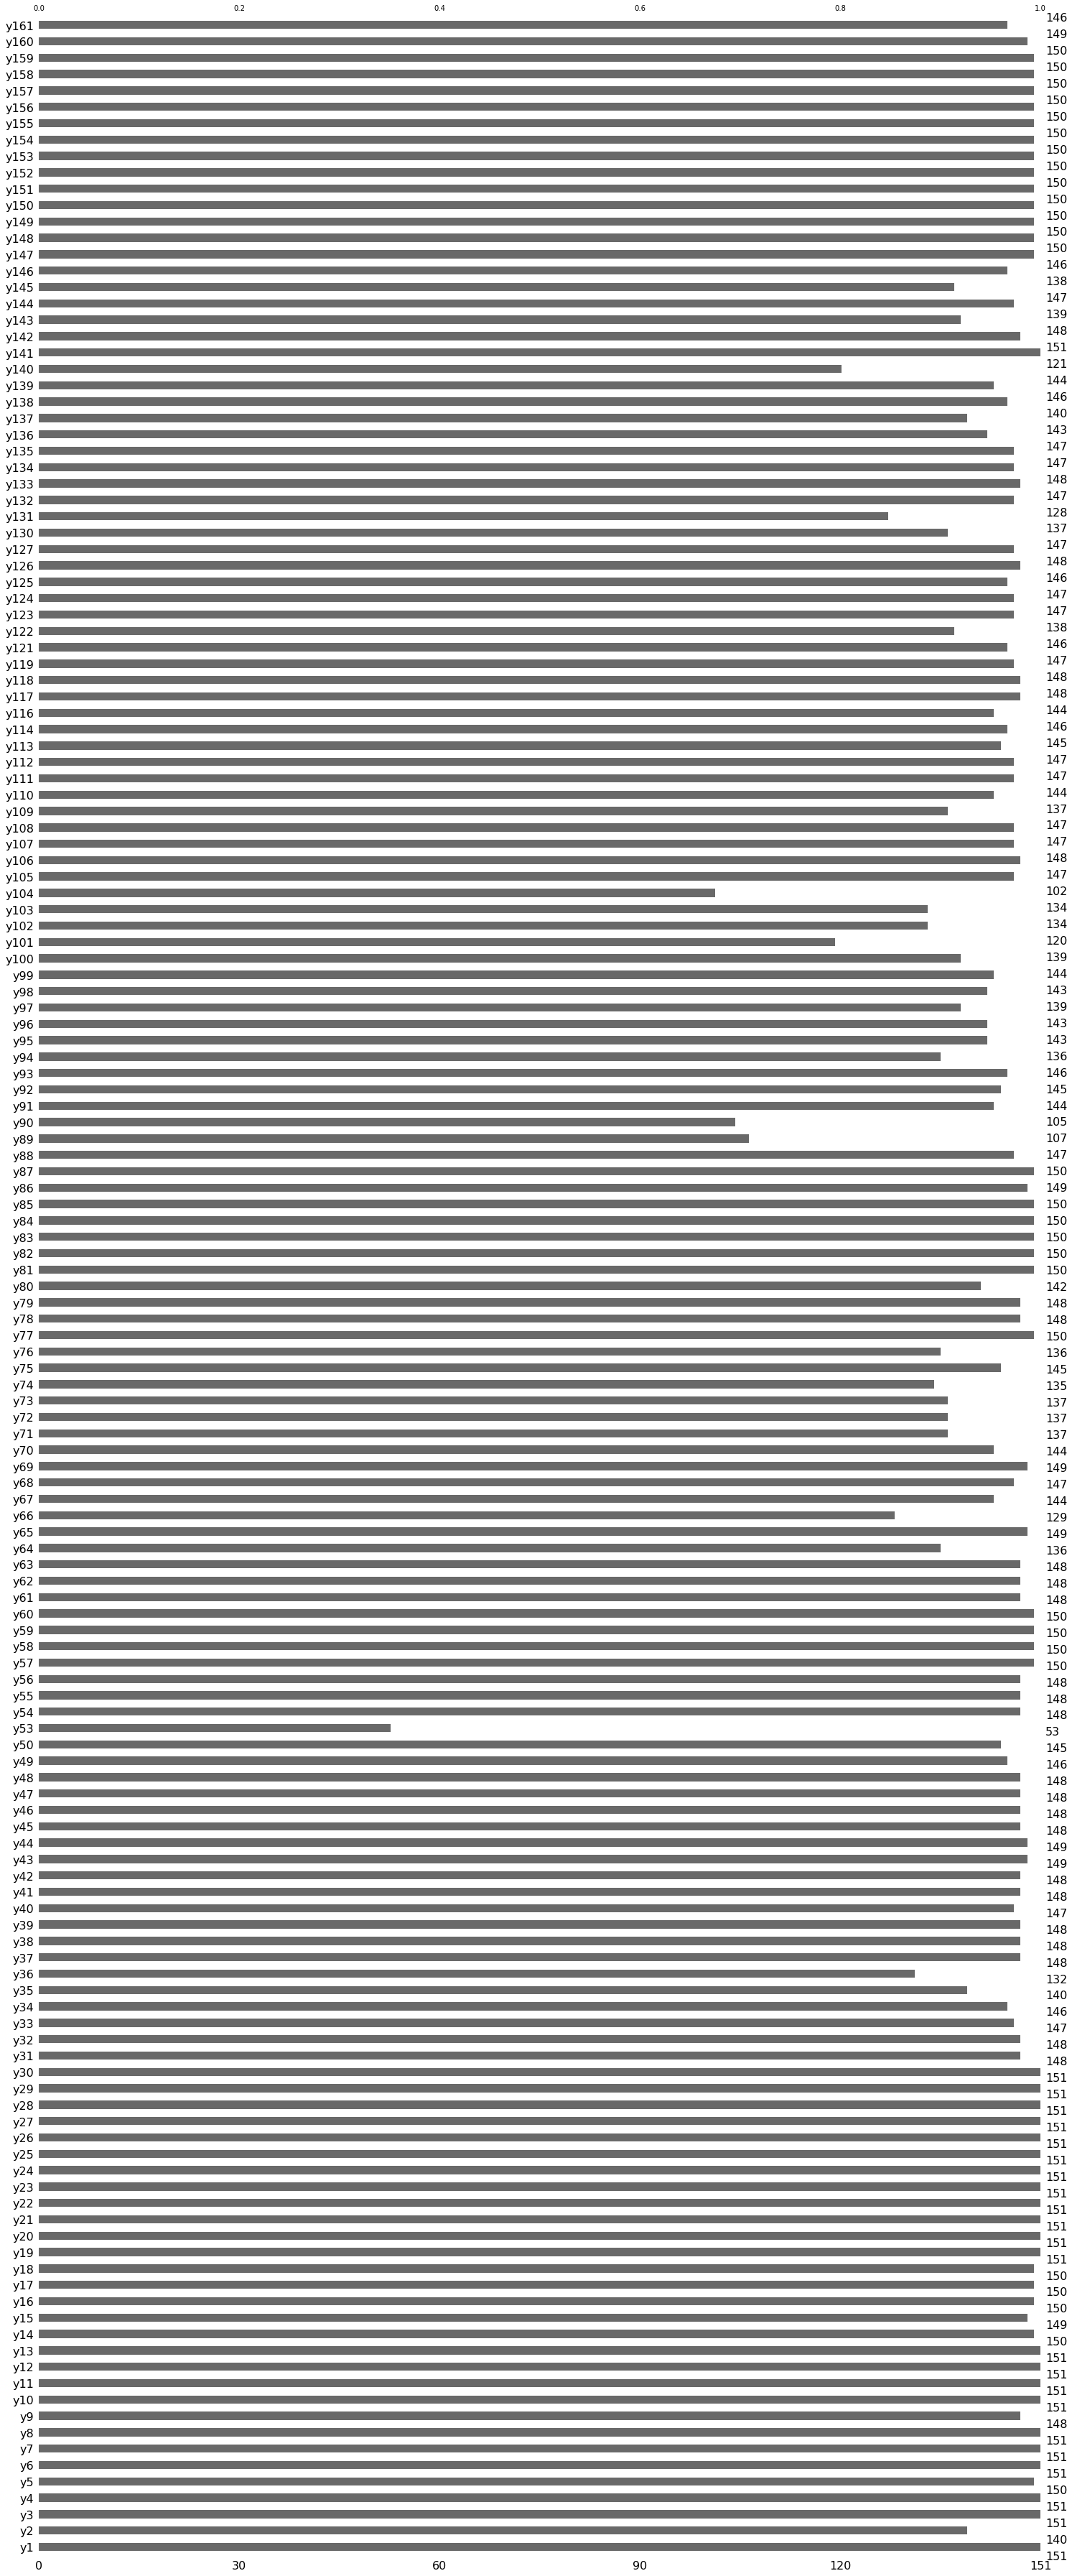

In [28]:
msno.bar(efa_2017)

<AxesSubplot:>

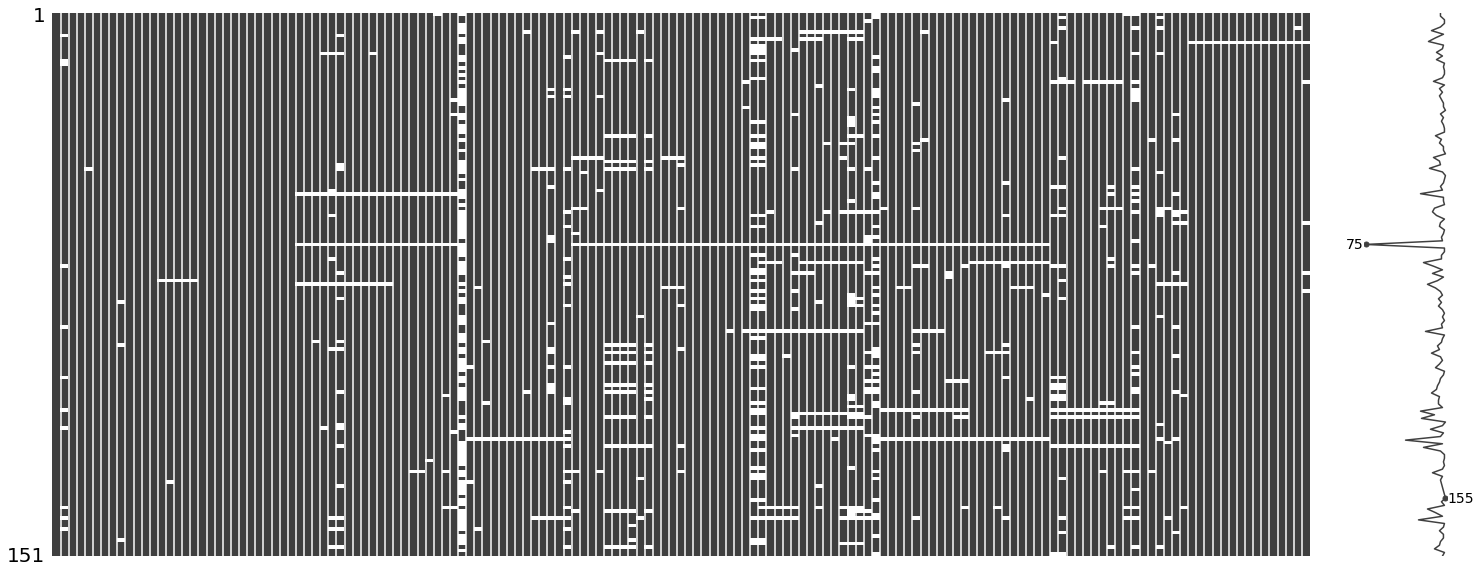

In [29]:
msno.matrix(efa_2017)

<AxesSubplot:>

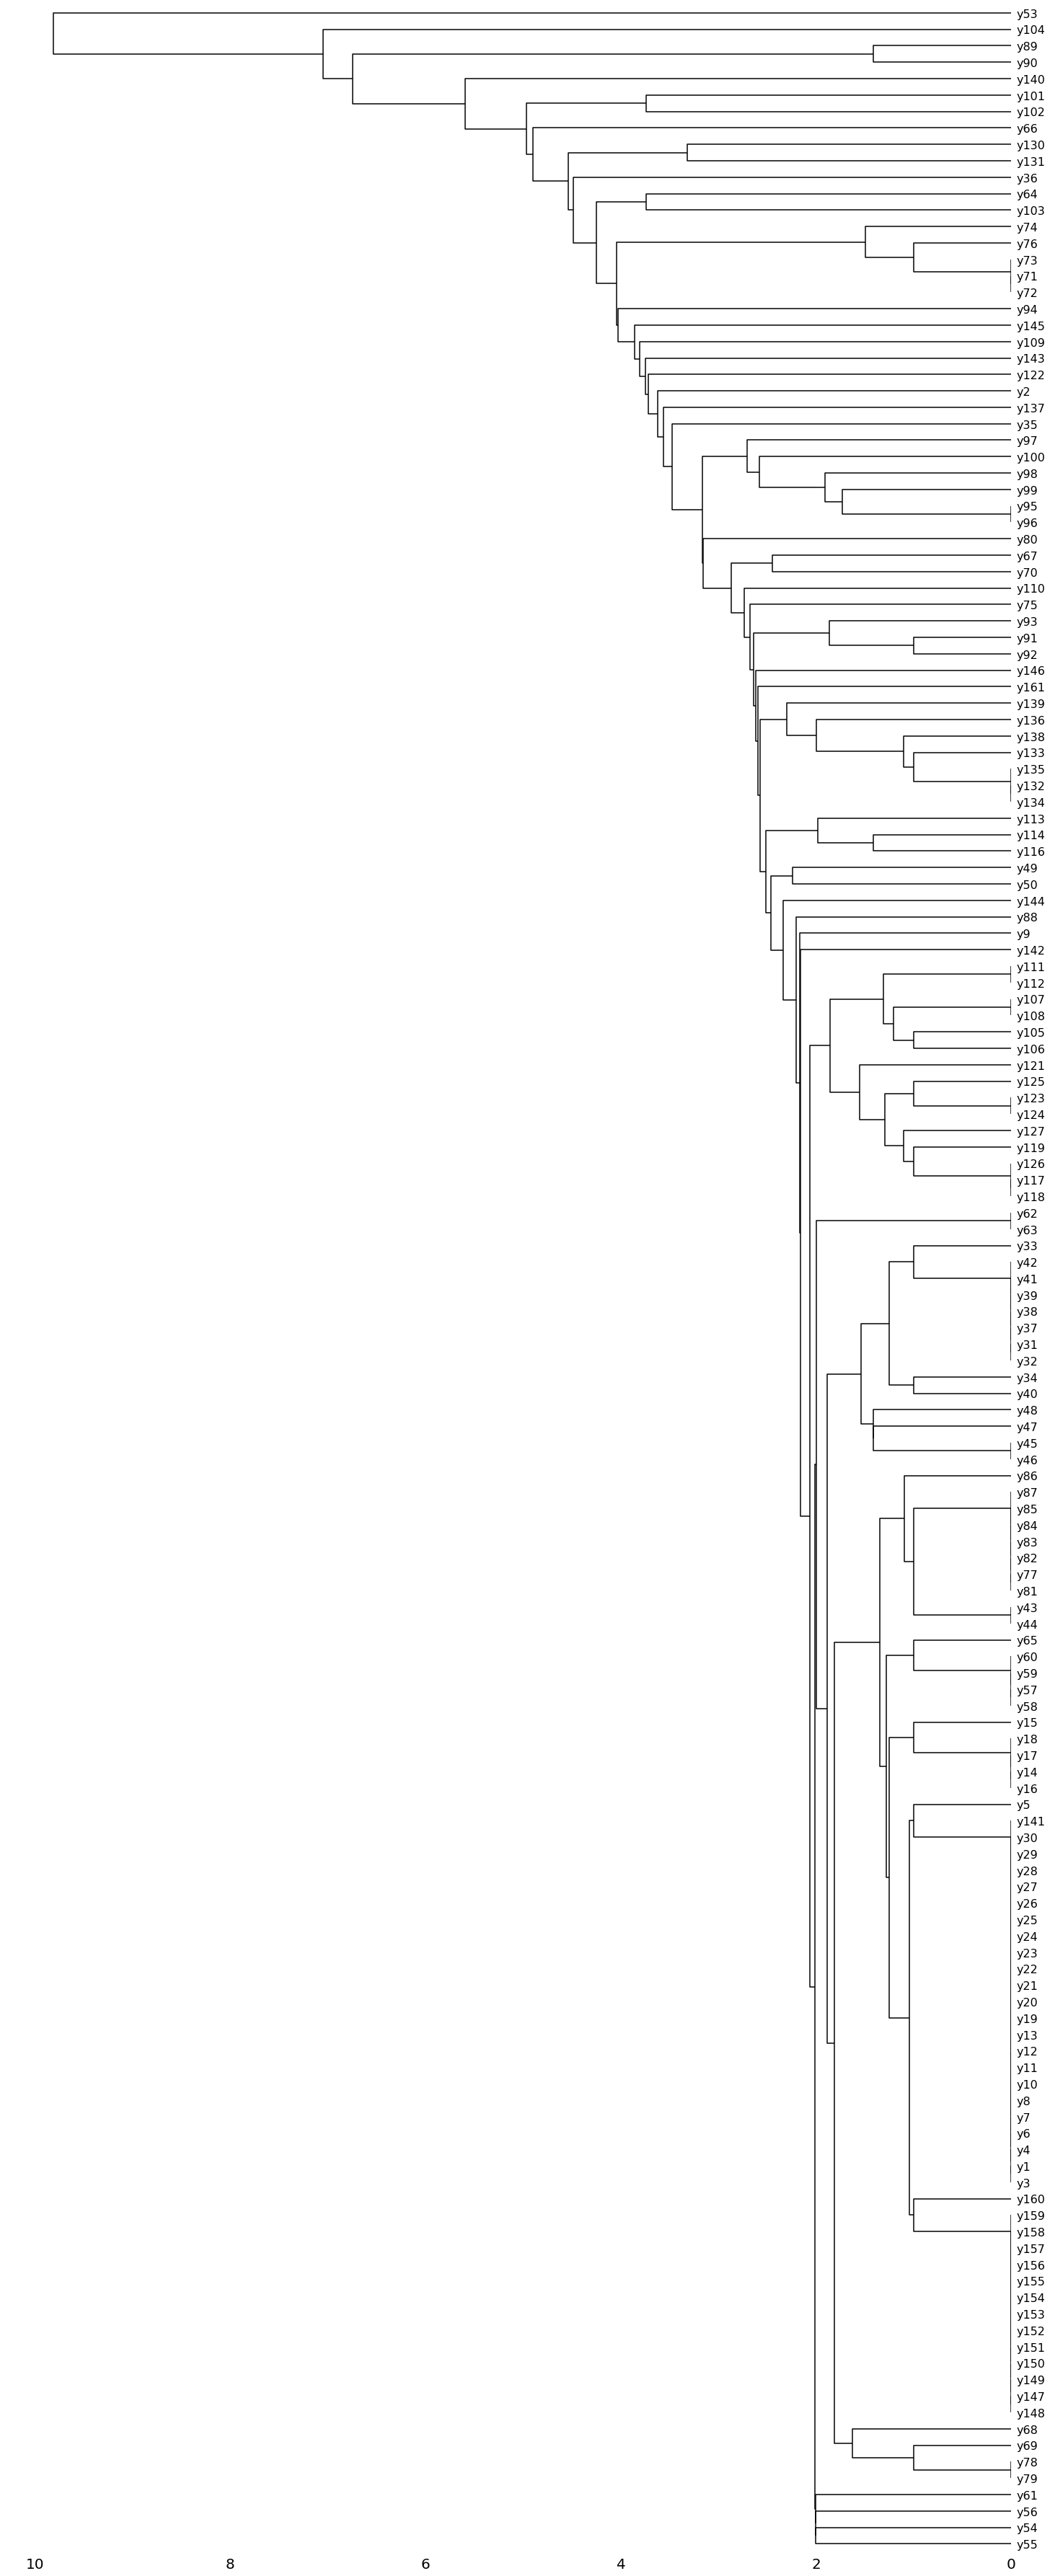

In [30]:
msno.dendrogram(efa_2017)

In [31]:
## for purposes of factor determination, impute using means
#################################################

efa_2017_impute = efa_2017.fillna(efa_2017.mean())

##################################################

In [32]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(efa_2017_impute)
chi_square_value, p_value

## significant test = factorisable

C:\Users\Joe Z\anaconda3\envs\nlp\lib\site-packages\factor_analyzer\factor_analyzer.py:111: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

In [33]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(efa_2017_impute)
kmo_model

## <0.6 is inadequate

nan

In [34]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(efa_2017_impute)
loadings = fa.loadings_

ev, v = fa.get_eigenvalues()
pd.DataFrame(data =(ev.astype(str), v, np.cumsum(v)), index = ['eigenvalues', 'variance', 'var_sum'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
eigenvalues,33.53059355506893,8.908213154689129,7.111327556925227,4.509759232623299,3.755301510537404,3.2812722956108127,3.2082614408136814,2.9229904862499114,2.8928836199701253,2.7734407096332867,2.6506175252748982,2.5704551830656794,2.4452837159326823,2.3987502142792843,2.1895753083855056,2.09443378278476,2.0212516952925825,1.985543255341967,1.8732234100677874,1.7907142758812558,1.760185069541925,1.6992396642606744,1.6480893311230418,1.595311974838775,1.5724299711505343,1.531596367385038,1.4978071814173994,1.4620815465409518,1.4252389032471808,1.384272373040105,1.3377774633769253,1.3015315704928412,1.2433828599621577,1.2167921284316139,1.1911320936838552,1.1626732378271054,1.132992097950748,1.055326919496099,1.0471246826211136,1.030046048721651,1.0080238957054932,1.0031789519855134,0.9783909372711495,0.9386126923611744,0.9152774727815618,0.8829791170678979,0.8493542059884877,0.8250850976520685,0.807439441828738,0.7804397801165127,0.7766116018489292,0.7628621871013482,0.7410586867292019,0.719108837455423,0.6882617583795476,0.6743589713343053,0.6543144173287214,0.6455411961017841,0.624509563485931,0.6163750785338802,0.6080128833136021,0.5736789484965084,0.5642497944372656,0.556832967582916,0.55057761668011,0.5348172856783533,0.5198110616436059,0.5014631210421322,0.47561026657437994,0.46330511154407367,0.46215640853023693,0.4570385015873422,0.43153910416510377,0.42223770071643996,0.4082500054471594,0.3949990887396004,0.3836325554119142,0.36870999387410663,0.34936776023541494,0.33520253781837217,0.33164237737068086,0.32417349399991846,0.3137985779136306,0.29667388288210317,0.2897715030460731,0.2866761879570635,0.2678687511090724,0.25754955765633675,0.2536024594500331,0.24785838556599274,0.23661025445092604,0.22605813567849534,0.21850599654022845,0.20885503862229163,0.19436845317891766,0.185600028136128,0.18164722370283495,0.17724315512762415,0.17305289865450008,0.16661495626829478,0.16025433828755123,0.146523254667411,0.1443829737004126,0.14098293475458967,0.1341670106454079,0.12925184454973426,0.11876027189671086,0.11457066231370419,0.11248128593368237,0.10780007619521452,0.10238035476711606,0.09698850318139253,0.08964636301096919,0.0843740543336571,0.07712567421352942,0.07174081506847692,0.06734461535473608,0.06403609219886905,0.06178781246030445,0.060190310198729086,0.05791289553547357,0.052367545153858205,0.05102092689957849,0.04503330912705582,0.043146207401323654,0.04110684308664858,0.0364125626033563,0.03515478654470262,0.03302086360325688,0.028901760178964064,0.02741585111062578,0.021922334146327275,0.020123526792440304,0.017219170976087935,0.015628107622178002,0.014240366869910202,0.0123280193228558,0.011758246352466733,0.010772115393545426,0.008196034381411884,0.007712092035823041,0.005383713408442674,0.004638674602357874,0.004069384061253288,0.00329900516535223,0.002724211255729509,0.0015456109478135178,0.0009564714388271571,0.0005355877047696705,0.00029319311997924753,1.0767895388154651e-16,1.1150246799544282e-17,7.846297030020032e-18,-1.2874378826546564e-16,-4.453607725765039e-16
variance,32.895707,8.426223,6.629569,3.73845,3.00343,2.502604,2.446455,2.171446,2.107075,2.013043,1.898103,1.78371,1.715239,1.666844,1.418912,1.356972,1.272894,1.252844,1.123587,1.110465,1.0408,0.995738,0.91709,0.863074,0.83781,0.787357,0.764438,0.721001,0.711797,0.667524,0.637376,0.599669,0.542647,0.507706,0.500192,0.457633,0.437329,0.369571,0.351668,0.334394,0.319065,0.307154,0.275809,0.240292,0.210183,0.196701,0.174053,0.145363,0.12543,

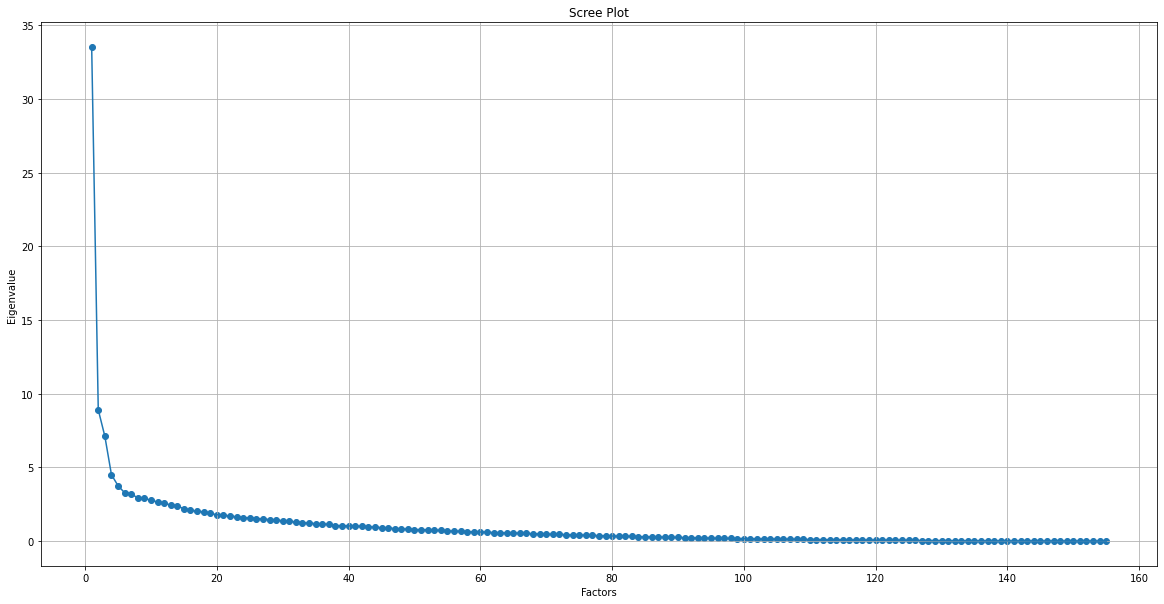

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(range(1,efa_2017_impute.shape[1]+1),ev)
plt.plot(range(1,efa_2017_impute.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [36]:
fct = 42

fa = FactorAnalyzer()
fa.set_params(n_factors=fct, rotation="promax")
fa.fit(efa_2017)
loadings = fa.loadings_

In [37]:
efa_factors = pd.DataFrame(fa.loadings_,index=efa_2017.columns)

In [38]:
efa_factors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
y1,0.736141,0.044162,0.194600,0.066930,-0.054620,-0.078344,-0.024119,0.030326,-0.127770,0.023090,0.119571,0.117666,-0.069514,0.007417,0.175055,-0.046845,0.009671,0.218371,0.062975,-0.020323,-0.093537,-0.115634,-0.010541,-0.059612,0.111689,0.135443,-0.112605,-0.180023,-0.008653,0.094684,0.003199,-0.204025,-0.022659,-0.041077,0.114251,-0.018296,0.130477,0.064098,-0.015076,0.036370,-0.003658,0.144248
y2,0.268112,-0.077040,-0.009965,0.144947,-0.134604,-0.005904,0.111464,-0.118958,-0.146807,-0.102122,0.070327,0.043846,-0.058223,0.592862,0.022941,0.172414,-0.064237,0.041089,0.030422,-0.071463,0.134597,0.049092,-0.026927,0.115732,-0.126579,-0.066023,0.103755,0.090147,0.192969,0.075304,-0.416110,-0.038330,0.058308,0.015717,-0.111010,-0.183725,0.104432,0.060662,-0.054475,-0.021824,0.069800,-0.002993
y3,0.922917,0.035973,-0.095989,-0.000487,-0.007783,0.006056,0.035147,-0.048745,0.007133,0.159976,-0.058412,-0.094937,-0.152630,0.126402,0.086693,-0.075255,-0.048721,-0.015966,-0.076029,0.078390,0.200705,-0.163832,-0.043833,0.002527,0.156941,0.196811,0.116035,0.000746,-0.038521,0.082676,0.035049,-0.042021,-0.111105,-0.052757,0.086716,-0.049490,-0.036632,0.249223,-0.132049,-0.048588,0.070140,-0.029549
y4,0.296317,-0.128617,-0.342110,0.193433,0.020424,-0.017469,0.245183,0.040095,0.066562,0.018856,-0.015842,0.005183,0.005130,0.206529,0.071672,0.227940,-0.044593,-0.027073,-0.075569,-0.039908,0.044939,0.103651,0.075451,0.074020,0.082731,0.185498,0.184388,0.113483,0.014770,-0.066585,0.098091,-0.102315,0.107774,-0.139192,0.113551,-0.029131,-0.106850,-0.056926,-0.032932,0.036281,0.038631,-0.008778
y5,0.243766,0.098145,-0.192558,0.092425,0.041920,0.133059,0.084873,-0.122975,0.224506,0.022205,0.186276,0.037621,0.029505,-0.107032,-0.130099,0.167714,-0.044307,-0.093549,-0.178450,0.101101,0.158527,0.121388,0.027277,0.016785,0.045959,-0.006322,-0.052886,0.017615,0.132904,-0.050123,0.125270,0.105402,-0.051179,0.072194,0.149300,-0.236792,0.094890,-0.036667,0.040345,-0.070883,-0.303554,-0.039871
y6,0.592781,0.142382,0.151798,-0.074838,-0.113804,0.011987,0.015098,-0.016162,0.075756,0.024916,0.211199,0.050108,0.046824,-0.073763,0.096999,-0.050710,0.098270,0.008154,-0.153035,-0.106214,0.010262,-0.124482,0.121595,0.044732,0.012408,-0.058255,-0.096115,0.036958,-0.198054,0.025744,0.077018,0.055364,-0.011625,-0.052719,0.086535,0.055723,0.047068,-0.025841,0.002666,0.036093,0.096782,0.334816
y7,0.510523,0.103559,-0.178257,0.022701,-0.181378,0.115104,-0.002645,0.124093,0.070034,-0.130484,-0.080075,0.130532,0.017426,-0.120382,0.087663,-0.036697,-0.151772,-0.165570,0.178591,0.118775,-0.087596,-0.060473,-0.001805,-0.022795,0.021365,0.075843,-0.038680,0.042440,-0.052169,-0.034207,-0.091513,-0.191697,0.115712,0.080774,-0.045699,-0.028124,0.065133,-0.081566,-0.138280,0.197192,-0.109193,0.377990
y8,0.441041,-0.031265,0.046979,-0.018182,0.039040,0.035034,-0.046813,0.102832,0.030856,-0.114293,-0.005830,-0.066386,-0.090194,-0.353223,0.128714,-0.071498,-0.271864,-0.035799,-0.256979,-0.109501,0.159600,-0.059084,0.139426,0.049520,0.102613,0.054417,0.143474,0.026733,0.017068,-0.006594,-0.013418,0.230966,0.258491,0.056089,-0.007148,0.056652,0.006506,-0.169986,0.160195,-0.085402,-0.048705,0.204924
y9,0.587838,-0.031641,0.031250,-0.162505,0.138746,-0.010075,-0.061026,-0.076621,-0.184505,-0.074032,-0.137656,-0.107140,-0.107822,0.085739,-0.081959,-0.220112,-0.154446,-0.191665,-0.037908,-0.086340,0.033232,-0.056210,0.029524,-0.073819,0.177673,0.003104,0.077677,0.056198,0.019031,-0.008469,-0.030148,-0.052286,0.424644,0.026314,0.024576,0.108846,0.040758,-0.016643,-0.011027,0.097584,0.088440,0.084024
y10,0.829356,0.126981,0.089508,-0.015010,-0.087801,0.051800,0.054804,-0.166173,0.084585,-0.020890,0.231710,-0.085979,-0.010206,0.166723,-0.077347,-0.157319,-0.030785,-0.039753,-0.258452,0.188836,0.071717,0.117151,-0.101277,0.042520,-0.056976,-0.060431,0.003720,-0.097382,-0.165529

In [39]:
## join to key to get questions
key2017 = pd.read_excel('data/acute/0000_question_key.xlsx')

In [40]:
key2017T = key2017.T
key2017T.columns = key2017T.iloc[0]
key2017T = key2017T.drop(key2017T.index[0])

In [41]:
Q2017 = key2017T[['2017_section', '2017_key', '2017_all']].copy()
Q2017.dropna(inplace=True)
Q2017

2016_theme,2017_section,2017_key,2017_all
readiness,strategic,y1,Your organisation has a clearly defined digital strategy which is aligned to clinical and corporate objectives.
readiness.1,strategic,y2,"Implementation of the digital strategy is fully aligned to, and supported by, a service transformation programme(s)."
readiness.2,strategic,y3,There are processes in place to scrutinise and evaluate investment in digital technology and support ideas through to implementation.
readiness.3,strategic,y4,Digital technology is used to support improved collaboration and coordination across different parts of your organisation.
readiness.4,strategic,y5,Your organisation participates in an initiative across your health and care community to achieve digital record sharing.
readiness.5,leadership,y6,Your Board owns the organisation's digital strategy and receives regular updates about progress.
readiness.6,leadership,y7,The team leading the organisation's digital transformation includes a board-level sponsor.
readiness.7,leadership,y8,"You have clinical leadership, represented by a board-level or equivalent position, involved in the digital agenda."
readiness.8,leadership,y9,Your CCIO or equivalent has protected time as part of his/her job plan to undertake the requirements of the role within your organisation.
readiness.9,leadership,y10,Your organisation monitors emerging healthcare digital technology trends to keep the digital strategy up to date.


In [42]:
joined = pd.concat([efa_factors,
           Q2017.set_index('2017_key')], axis=1, join='inner')

joined['2017_key'] = joined.index

joined

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,2017_section,2017_all,2017_key
y1,0.736141,0.044162,0.194600,0.066930,-0.054620,-0.078344,-0.024119,0.030326,-0.127770,0.023090,0.119571,0.117666,-0.069514,0.007417,0.175055,-0.046845,0.009671,0.218371,0.062975,-0.020323,-0.093537,-0.115634,-0.010541,-0.059612,0.111689,0.135443,-0.112605,-0.180023,-0.008653,0.094684,0.003199,-0.204025,-0.022659,-0.041077,0.114251,-0.018296,0.130477,0.064098,-0.015076,0.036370,-0.003658,0.144248,strategic,Your organisation has a clearly defined digital strategy which is aligned to clinical and corporate objectives.,y1
y2,0.268112,-0.077040,-0.009965,0.144947,-0.134604,-0.005904,0.111464,-0.118958,-0.146807,-0.102122,0.070327,0.043846,-0.058223,0.592862,0.022941,0.172414,-0.064237,0.041089,0.030422,-0.071463,0.134597,0.049092,-0.026927,0.115732,-0.126579,-0.066023,0.103755,0.090147,0.192969,0.075304,-0.416110,-0.038330,0.058308,0.015717,-0.111010,-0.183725,0.104432,0.060662,-0.054475,-0.021824,0.069800,-0.002993,strategic,"Implementation of the digital strategy is fully aligned to, and supported by, a service transformation programme(s).",y2
y3,0.922917,0.035973,-0.095989,-0.000487,-0.007783,0.006056,0.035147,-0.048745,0.007133,0.159976,-0.058412,-0.094937,-0.152630,0.126402,0.086693,-0.075255,-0.048721,-0.015966,-0.076029,0.078390,0.200705,-0.163832,-0.043833,0.002527,0.156941,0.196811,0.116035,0.000746,-0.038521,0.082676,0.035049,-0.042021,-0.111105,-0.052757,0.086716,-0.049490,-0.036632,0.249223,-0.132049,-0.048588,0.070140,-0.029549,strategic,There are processes in place to scrutinise and evaluate investment in digital technology and support ideas through to implementation.,y3
y4,0.296317,-0.128617,-0.342110,0.193433,0.020424,-0.017469,0.245183,0.040095,0.066562,0.018856,-0.015842,0.005183,0.005130,0.206529,0.071672,0.227940,-0.044593,-0.027073,-0.075569,-0.039908,0.044939,0.103651,0.075451,0.074020,0.082731,0.185498,0.184388,0.113483,0.014770,-0.066585,0.098091,-0.102315,0.107774,-0.139192,0.113551,-0.029131,-0.106850,-0.056926,-0.032932,0.036281,0.038631,-0.008778,strategic,Digital technology is used to support improved collaboration and coordination across different parts of your organisation.,y4
y5,0.243766,0.098145,-0.192558,0.092425,0.041920,0.133059,0.084873,-0.122975,0.224506,0.022205,0.186276,0.037621,0.029505,-0.107032,-0.130099,0.167714,-0.044307,-0.093549,-0.178450,0.101101,0.158527,0.121388,0.027277,0.016785,0.045959,-0.006322,-0.052886,0.017615,0.132904,-0.050123,0.125270,0.105402,-0.051179,0.072194,0.149300,-0.236792,0.094890,-0.036667,0.040345,-0.070883,-0.303554,-0.039871,strategic,Your organisation participates in an initiative across your health and care community to achieve digital record sharing.,y5
y6,0.592781,0.142382,0.151798,-0.074838,-0.113804,0.011987,0.015098,-0.016162,0.075756,0.024916,0.211199,0.050108,0.046824,-0.073763,0.096999,-0.050710,0.098270,0.008154,-0.153035,-0.106214,0.010262,-0.124482,0.121595,0.044732,0.012408,-0.058255,-0.096115,0.036958,-0.198054,0.025744,0.077018,0.055364,-0.011625,-0.052719,0.086535,0.055723,0.047068,-0.025841,0.002666,0.036093,0.096782,0.334816,leadership,Your Board owns the organisation's digital strategy and receives regular updates about progress.,y6
y7,0.510523,0.103559,-0.178257,0.022701,-0.181378,0.115104,-0.002645,0.124093,0.070034,-0.130484,-0.080075,0.130532,0.017426,-0.120382,0.087663,-0.036697,-0.151772,-0.165570,0.178591,0.118775,-0.087596,-0.060473,-0.001805,-0.022795,0.021365,0.075843,-0.038680,0.042440,-0.052169,-0.034207,-0.091513,-0.191697,0.115712,0.080774,-0.045699,-0.028124,0.065133,-0.081566,-0.138280,0.197192,-0.109193,0.377990,leadership,The team leading the organisation's digital transformation includes a board-level sponsor.,y7
y8,0.441041,-0.031265,0.046979,-0.018182,0.039040,0.035034,-0.046813,0.102832,0.030856,-0.114293,-0.005830,-0.066386,-0.090194,-0.353223,0.128714,-0.071498,-0.27186

In [43]:
## question groups by factor

In [44]:
cols = list(range(fct))
assigned = pd.DataFrame()

In [46]:
for c in cols:
    new = (joined[joined[c] > 0.3])
    new = new.drop(new.columns[cols], axis=1)
    new['factor'] = c
    new['loading'] = joined[c]
    assigned = assigned.append(new,ignore_index=True)

In [47]:
assigned

,2017_section,2017_all,2017_key,factor,loading
0,strategic,Your organisation has a clearly defined digital strategy which is aligned to clinical and corporate objectives.,y1,0,0.736141
1,strategic,There are processes in place to scrutinise and evaluate investment in digital technology and support ideas through to implementation.,y3,0,0.922917
2,leadership,Your Board owns the organisation's digital strategy and receives regular updates about progress.,y6,0,0.592781
3,leadership,The team leading the organisation's digital transformation includes a board-level sponsor.,y7,0,0.510523
4,leadership,"You have clinical leadership, represented by a board-level or equivalent position, involved in the digital agenda.",y8,0,0.441041
5,leadership,Your CCIO or equivalent has protected time as part of his/her job plan to undertake the requirements of the role within your organisation.,y9,0,0.587838
6,leadership,Your organisation monitors emerging healthcare digital technology trends to keep the digital strategy up to date.,y10,0,0.829356
7,leadership,Your organisation engages with health and care professionals to ensure digital solutions meet evolving organisational needs.,y11,0,0.725354
8,leadership,You have recognised and engaged digital leadership throughout all levels of the organisation.,y12,0,0.755729
9,leadership,Your organisation takes an active role in helping patient and service users? improve their access to and use of digital services.,y13,0,0.527975


In [48]:
assigned.to_csv('output/2017_efa.csv')

In [ ]:
STOP STOP STOP

## 2016 structural equation modelling

In [ ]:
## https://towardsdatascience.com/structural-equation-modeling-dca298798f4d
## https://cr-c.medium.com/analysis-and-visualisation-of-sem-using-python-semopy-structural-equation-modeling-bd6c3f463e33
## https://medium.com/@nimmimohandas1985/structural-equation-modelling-with-semopy-e6759f3f614b


In [ ]:
data_2016 = pd.read_csv('data/acute/sem/2016_acute_questions_keyed.csv')
data_2017 = pd.read_csv('data/acute/sem/2017_acute_questions_keyed.csv')

In [ ]:
sem_2016 = data_2016.drop(columns = ['organisation_name', 'organisation_id'], axis=1)
sem_2017 = data_2017.drop(columns = ['organisation_name', 'organisation_id'], axis=1)

In [ ]:
## correlation matrix

corrMatrix = sem_2016.corr(method = 'pearson')
fig = plt.figure(figsize=(200,200))
sns.heatmap(corrMatrix, annot=True)
plt.show()

fig.savefig('heatmap.png')

In [ ]:
sem_2016 = sem_2016.fillna(sem_2016.mean())

In [ ]:
model_cdmi = """
# measurement model
cdmi =~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x14 + x15 + x16 + x17 + x18 + x19 + x20 + x21 + x22 + x23 + z1 + x26 + x27 + x28 + x29 + x30 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x50 + x54 + x55 + x56 + x62 + x57 + x58 + x59 + x60 + x61 + x67 + x68 + x69 + x70 + x71 + x72 + x73 + x74 + x75 + x76 + x77 + x78 + x79 + x80 + x81 + z2 + x82 + x83 + x84 + x85 + x86 + x87 + x88 + x103 + x89 + x90 + x91 + z3 + x92 + x93 + x94 + x95 + x96 + x97 + x98 + x99 + x100 + x105 + x106 + x107 + x108 + x109 + x110 + x111 + x112 + x113 + x114 + x117 + x118 + x119 + x123 + x124 + x125 + x126 + x127 + x141 + x142 + x143 + x144 + x145 + x146 + x147 + x148 + x149 + x150 + x151 + x152 + x153 + x154 + x155 + x156 + x157
    """

In [ ]:
model_themes = """
# measurement model
cdmi =~ readiness + capabilities + infrastructure
#
readiness =~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x14 + x15 + x16 + x17 + x18 + x19 + x20 + x21 + x22 + x23 + z1 + x26 + x27 + x28 + x29 + x30
#
capabilities =~ x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x50 + x54 + x55 + x56 + x62 + x57 + x58 + x59 + x60 + x61 + x67 + x68 + x69 + x70 + x71 + x72 + x73 + x74 + x75 + x76 + x77 + x78 + x79 + x80 + x81 + z2 + x82 + x83 + x84 + x85 + x86 + x87 + x88 + x103 + x89 + x90 + x91 + z3 + x92 + x93 + x94 + x95 + x96 + x97 + x98 + x99 + x100 + x105 + x106 + x107 + x108 + x109 + x110 + x111 + x112 + x113 + x114 + x117 + x118 + x119 + x123 + x124 + x125 + x126 + x127 + x141 + x142 + x143 + x144 + x145 + x146
#
infrastructure =~ x147 + x148 + x149 + x150 + x151 + x152 + x153 + x154 + x155 + x156 + x157
    """

In [ ]:
model_2016 = """
# measurement model
#cdmi =~ readiness + capabilities + infrastructure
#
readiness =~ strategic + leadership + governance + information + resourcing
#
#capabilities =~ asset + decision + medicines + orders + records + remote + standards + transfers
#
#enabling_infrastructure =~ infrastructure
#
strategic =~ x1 + x2 + x3 + x4 + x5
leadership =~ x6 + x7 + x8 + x9 + x10
resourcing =~ x14 + x15 + x16 + x17 + x18
governance =~ x19 + x20 + x21 + x22 + x23
information =~ z1 + x26 + x27 + x28 + x29 + x30
#
#records =~ x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x50
#transfers =~ x54 + x55 + x56 + x62 + x57 + x58 + x59 + x60 + x61
#orders =~ x67 + x68 + x69 + x70 + x71 + x72 + x73 + x74 + x75 + x76 + x77 + x78 + x79 + x80 + x81 + z2 + x82 + x83 + x84
#medicines =~ x85 + x86 + x87 + x88 + x103 + x89 + x90 + x91 + z3 + x92 + x93 + x94 + x95 + x96 + x97 + x98 + x99 + x100
#decision =~ x105 + x106 + x107 + x108 + x109 + x110 + x111 + x112 + x113 + x114
#remote =~ x117 + x118 + x119
#asset =~ x123 + x124 + x125 + x126 + x127
#standards =~ x142 + x143 + x144 + x145 + x146 + x141 
#
#infrastructure =~ x147 + x148 + x149 + x150 + x151 + x152 + x153 + x154 + x155 + x156 + x157
    """

In [ ]:
model = sem.Model(model_2016)
model.fit(sem_2016, obj="MLW", solver="SLSQP")

In [ ]:
model.inspect(mode='list', what="names", std_est=True)

In [ ]:
sem.calc_stats(model)

In [ ]:
STOP STOP STOP

## 2016 to 2017 delta, themes and sections, geolocation

In [ ]:
df_2016_themes = pd.read_csv('data/acute/2016_acute_themes.csv')
df_2017_themes = pd.read_csv('data/acute/2017_acute_themes.csv')

In [ ]:
df_2016_themes = df_2016_themes.add_suffix('_2016')
df_2017_themes = df_2017_themes.add_suffix('_2017')

In [ ]:
df_combined = pd.concat([df_2016_themes.set_index('organisation_id_2016'),
           df_2017_themes.set_index('organisation_id_2017')], axis=1, join='inner').reset_index()

In [ ]:
#df_combined.rename(columns={"index":"trust_code"})

In [ ]:
df_combined.isna().sum()

In [ ]:
df_combined['readiness_delta'] = df_combined['readiness_2017'] - df_combined['readiness_2016']
df_combined['capabilities_delta'] = df_combined['capabilities_2017'] - df_combined['capabilities_2016']
df_combined['enabling_infrastructure_delta'] = df_combined['enabling_infrastructure_2017'] - df_combined['enabling_infrastructure_2016']

In [ ]:
df_combined['strategic_alignment_delta'] = df_combined['strategic_alignment_2017'] - df_combined['strategic_alignment_2016']
df_combined['leadership_delta'] = df_combined['leadership_2017'] - df_combined['leadership_2016']
df_combined['resourcing_delta'] = df_combined['resourcing_2017'] - df_combined['resourcing_2016']
df_combined['governance_delta'] = df_combined['governance_2017'] - df_combined['governance_2016']
df_combined['information_governance_delta'] = df_combined['information_governance_2017'] - df_combined['information_governance_2016']

In [ ]:
df_combined['asset_resource_optimisation_delta'] = df_combined['asset_&_resource_optimisation_2017'] - df_combined['asset_resource_optimisation_2016']
df_combined['decision_support_delta'] = df_combined['decision_support_2017'] - df_combined['decision_support_2016']
df_combined['medicines_management_optimisation_delta'] = df_combined['medicines_optimisation_2017'] - df_combined['medicines_management_optimisation_2016']
df_combined['orders_results_management_delta'] = df_combined['orders_&_results_management_2017'] - df_combined['orders_results_management_2016']

In [ ]:
df_combined['records_assessments_plans_delta'] = df_combined['records,_assessments_&_plans_2017'] - df_combined['records_assessments_plans_2016']
df_combined['remote_assistive_care_delta'] = df_combined['remote_&_assistive_care_2017'] - df_combined['remote_assistive_care_2016']
df_combined['standards_delta'] = df_combined['standards_2017'] - df_combined['standards_2016']
df_combined['transfers_of_care_delta'] = df_combined['transfers_of_care_2017'] - df_combined['transfers_of_care_2016']

In [ ]:
geolocated = pd.read_csv('data/geolocated.csv')

In [ ]:
geo_df = geolocated[['index', 'location', 'point']].copy()

In [ ]:
joined = df_combined.merge(geo_df, on= 'index', how='left')

In [ ]:
joined

In [ ]:
joined.to_csv('output/trusts_themes.csv')

## PCA

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df_2017c = df_2017b.drop(columns = ['organisation_name', 'organisation_id'], axis=1)

In [ ]:
df_2017c.head(15)

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [ ]:
imputed_2017 = imp.fit_transform(df_2017c)

In [ ]:
imputed_2017

In [ ]:
#df_2017imp = pd.DataFrame(data=imputed_2017[0:,0:],
#                          index = [i for i in range(imputed_2017.shape[0])],
#                          columns = df_2017c)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(imputed_2017)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x=principalDf['principal component 1'], y=principalDf['principal component 2'])
ax.grid()